In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

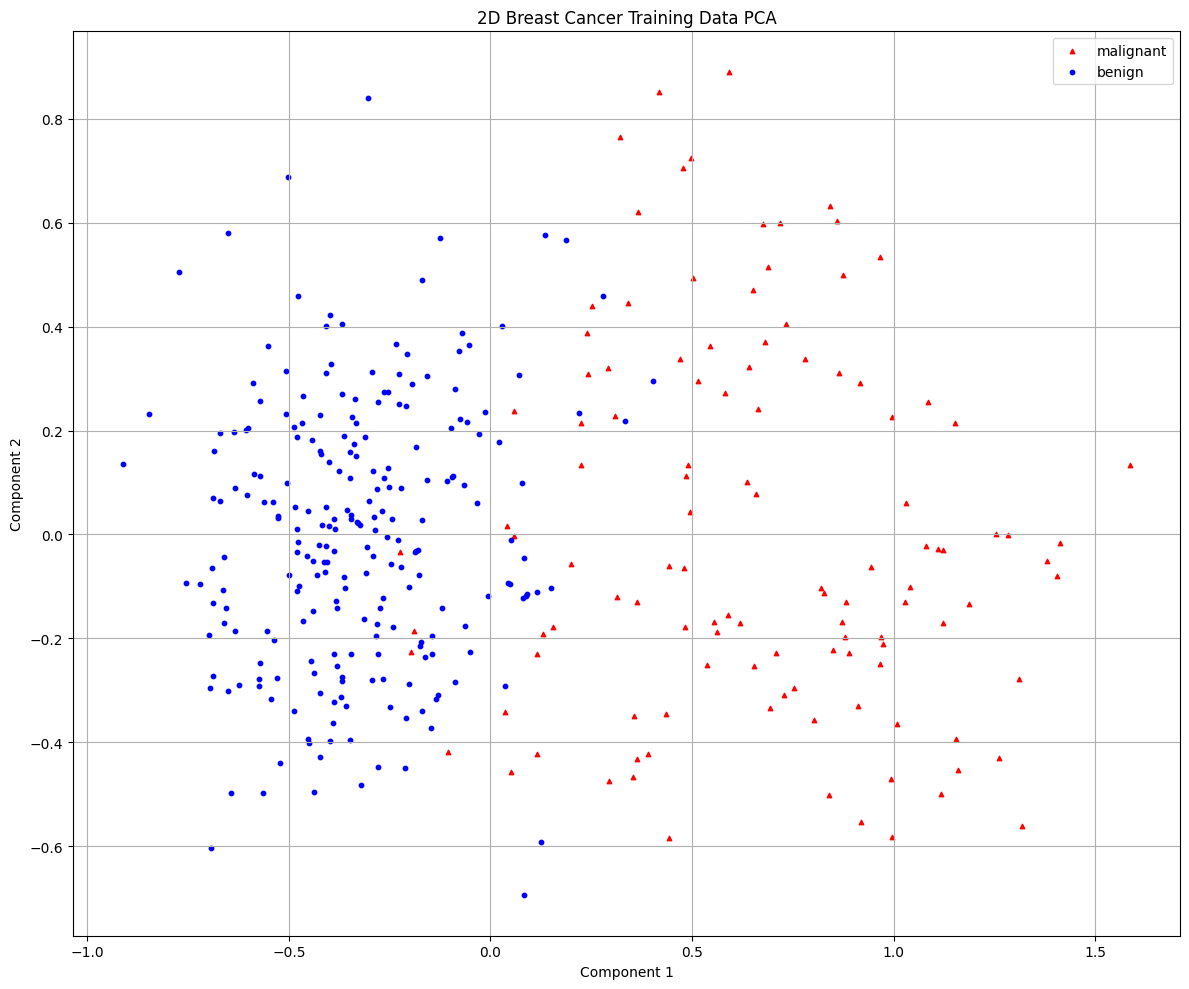

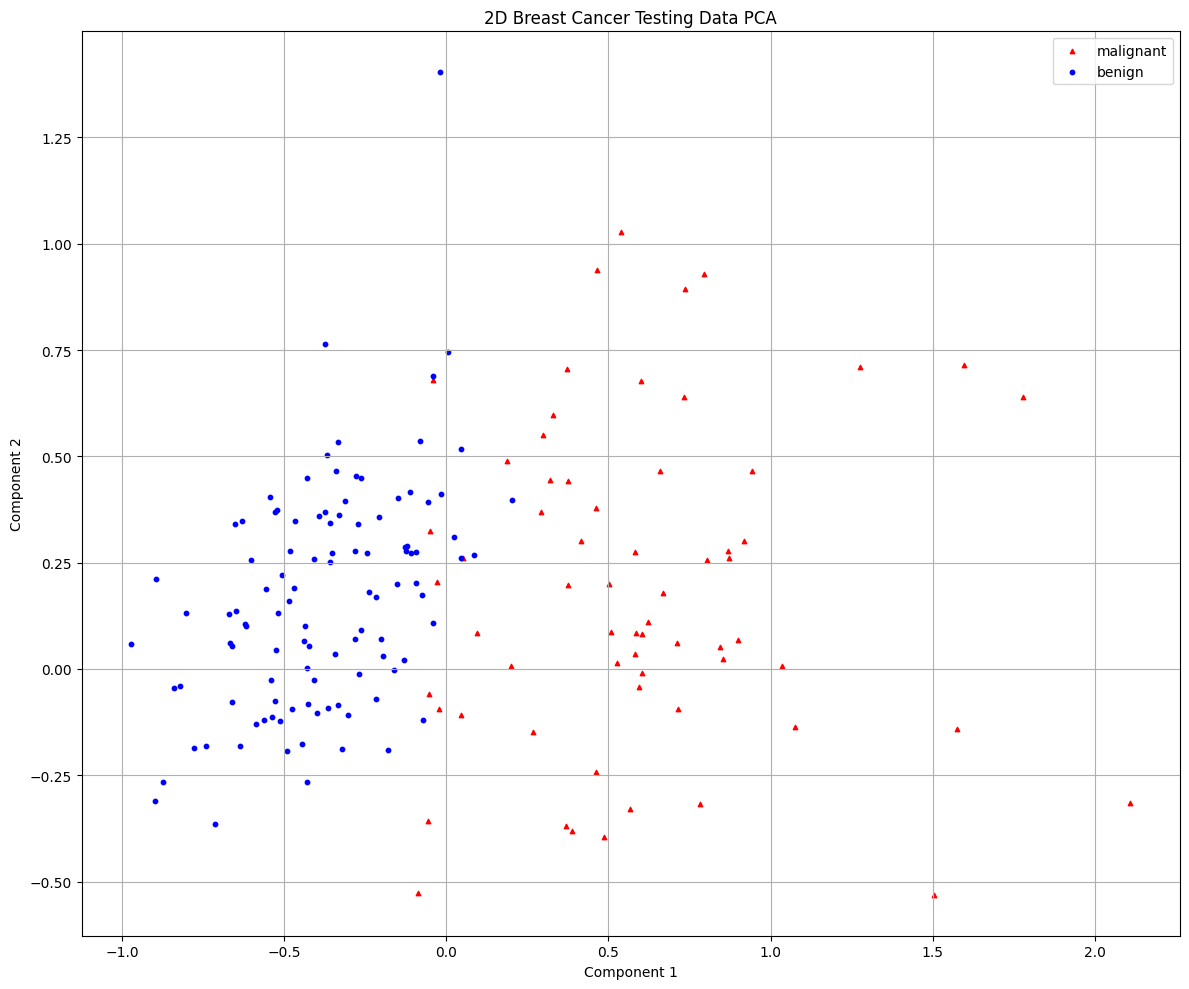

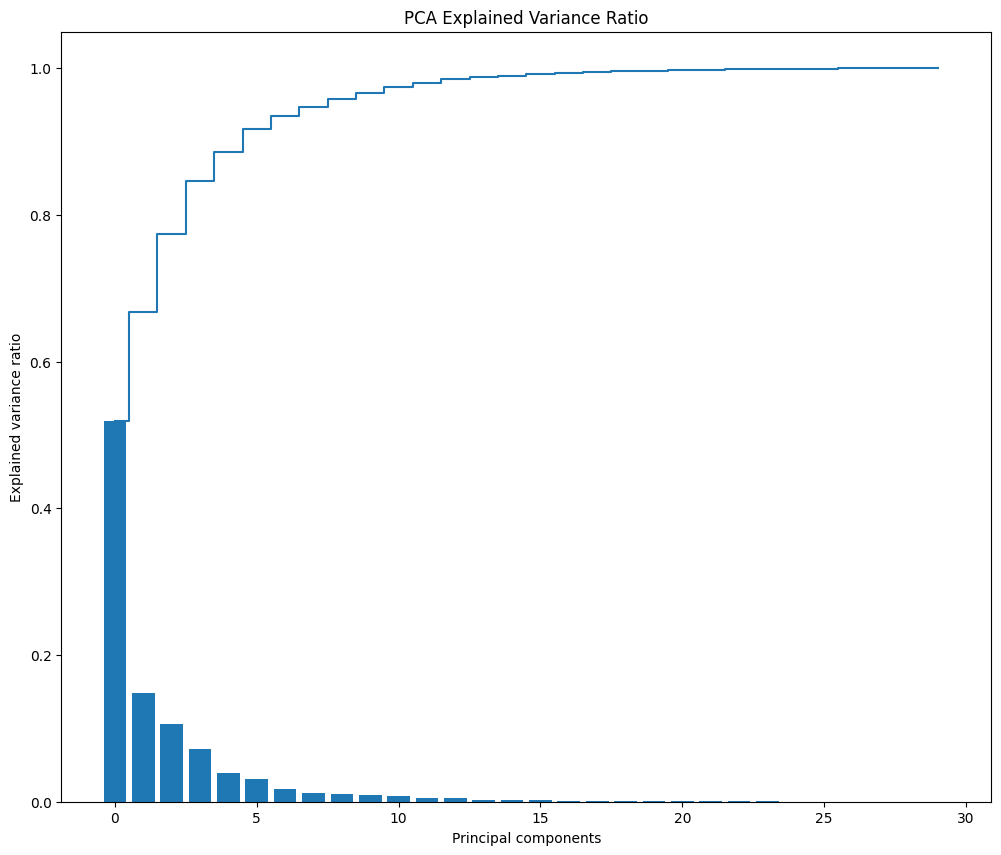

In [2]:
outlier_params = {'n_estimators': 1000, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'if', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {})

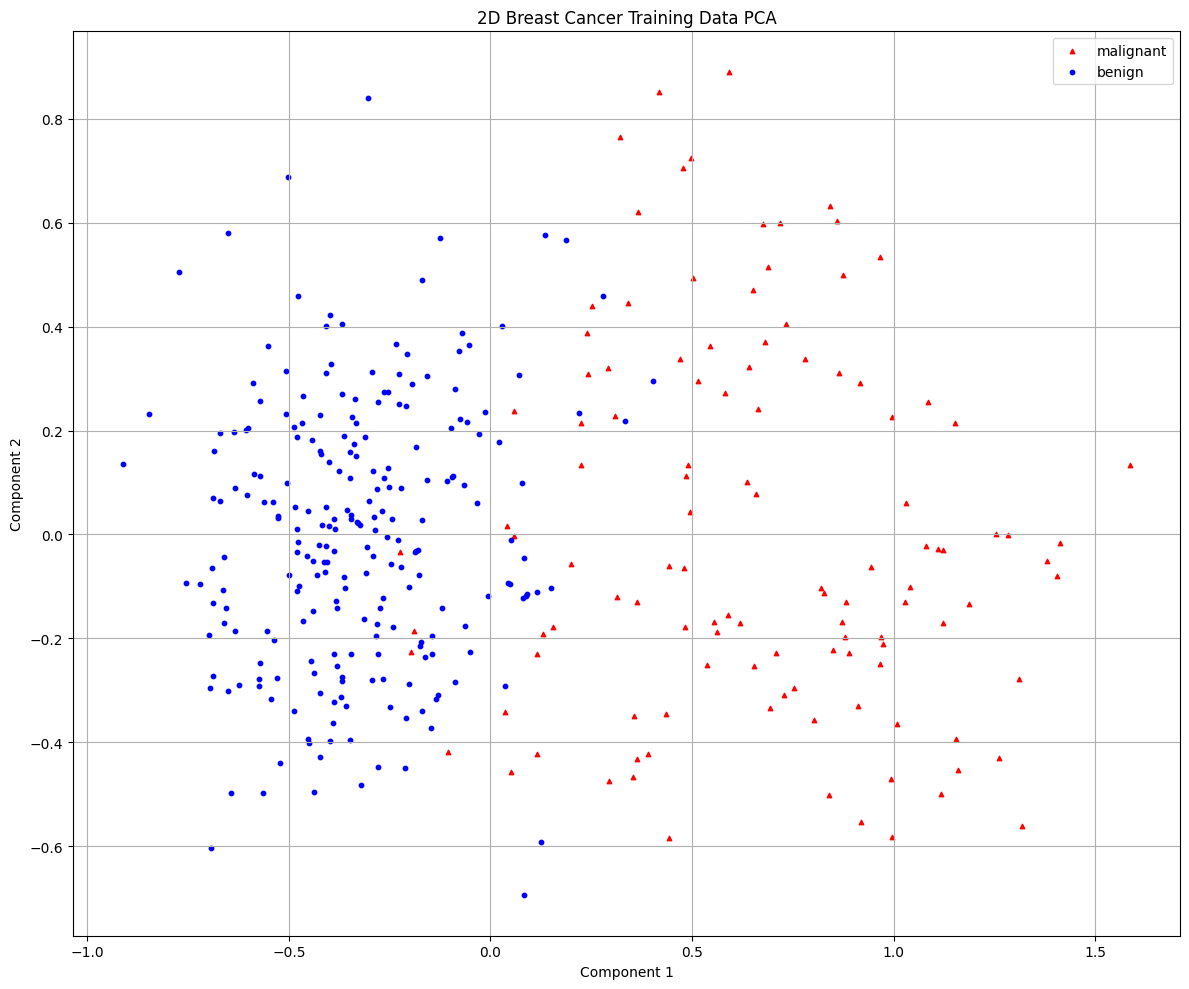

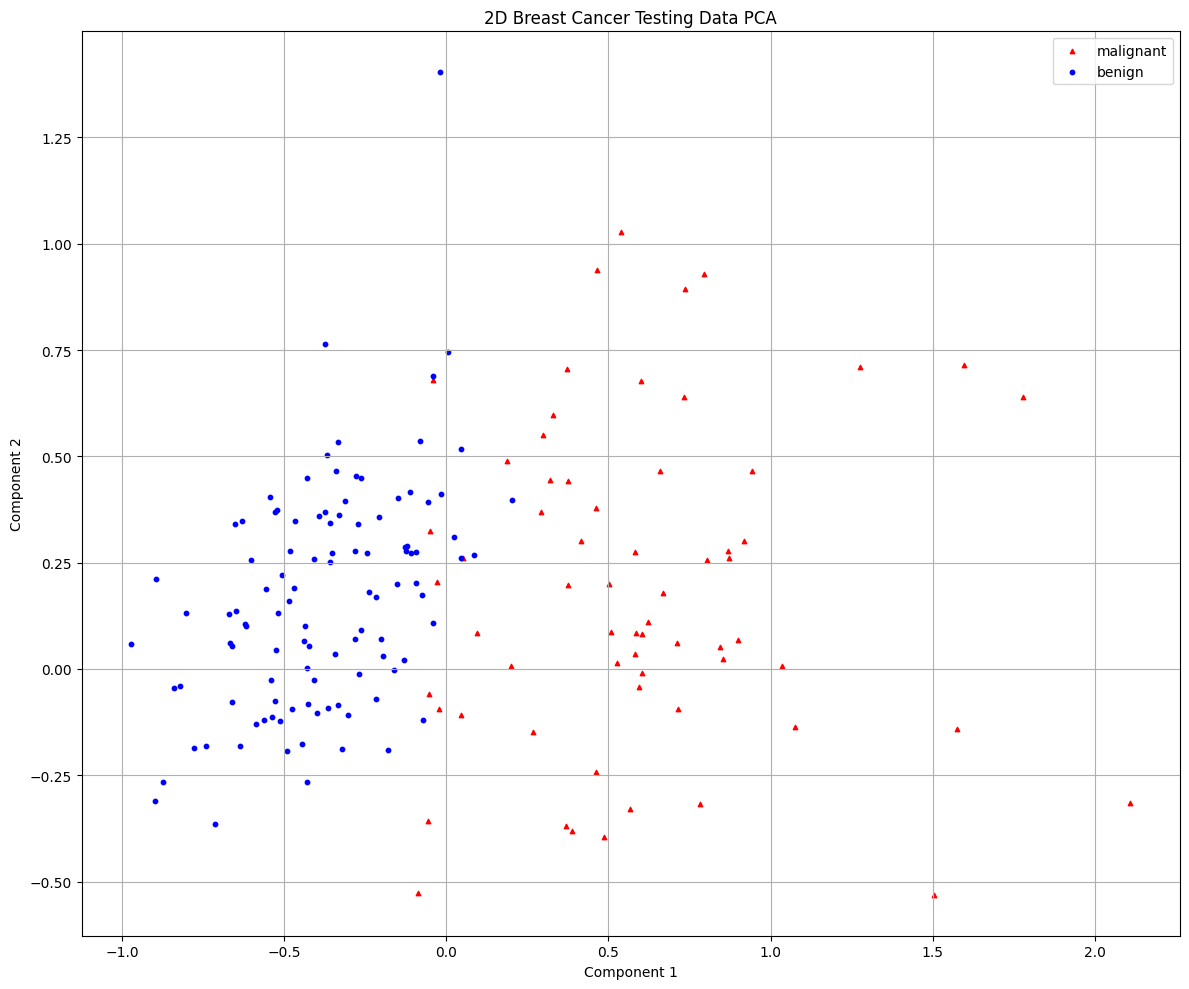

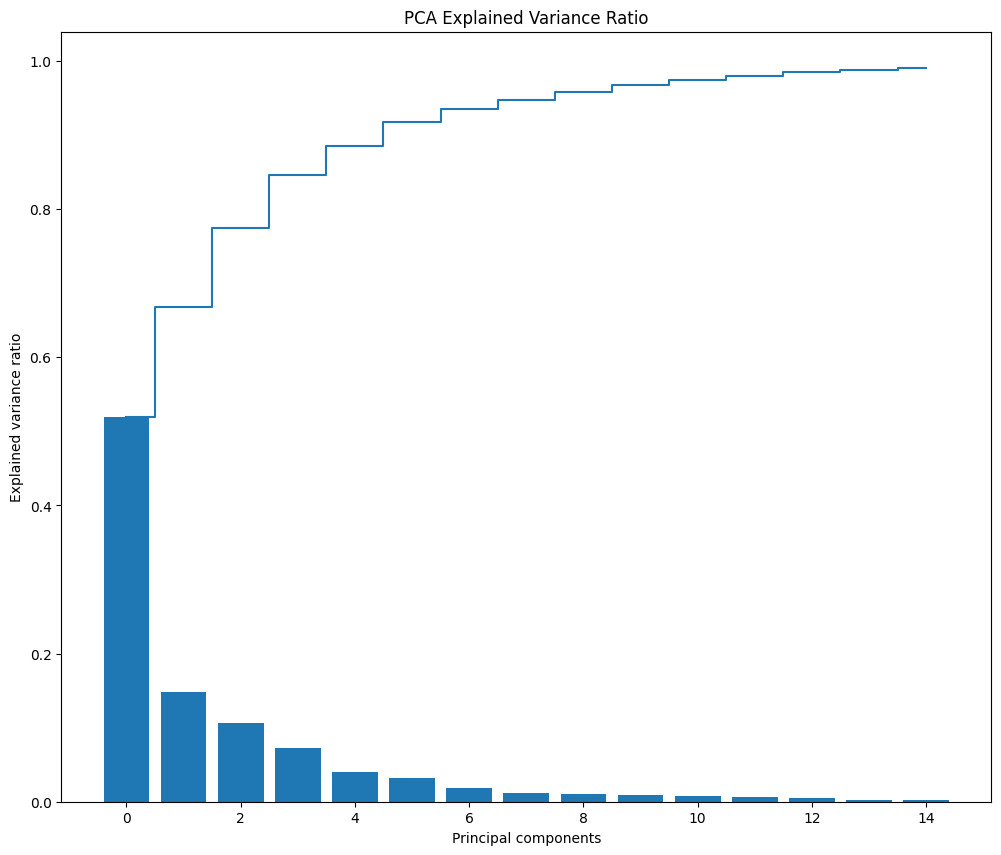

[I 2025-04-27 10:21:29,274] A new study created in memory with name: no-name-c1d08a3a-4f4b-4d8f-b07d-d5d2774a9b52
[I 2025-04-27 10:21:32,695] Trial 0 finished with value: 0.948692152917505 and parameters: {'n_estimators': 728, 'max_depth': 13, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.948692152917505.
[I 2025-04-27 10:21:34,861] Trial 1 finished with value: 0.9174245472837022 and parameters: {'n_estimators': 473, 'max_depth': 2, 'min_samples_split': 11, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.948692152917505.
[I 2025-04-27 10:21:38,984] Trial 2 finished with value: 0.9516700201207243 and parameters: {'n_estimators': 838, 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.9516700201207243.
[I 2025-04-27 10:21:41,324] Trial 3 finished with value: 0.948651911468813 and parameters: {'n_estimators': 488, 'max_depth': 6, 'min_samples_split': 12, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.

Best trial:
Accuracy: 0.9545271629778671
Best hyperparameters:  {'n_estimators': 746, 'max_depth': 23, 'min_samples_split': 2, 'min_samples_leaf': 16}


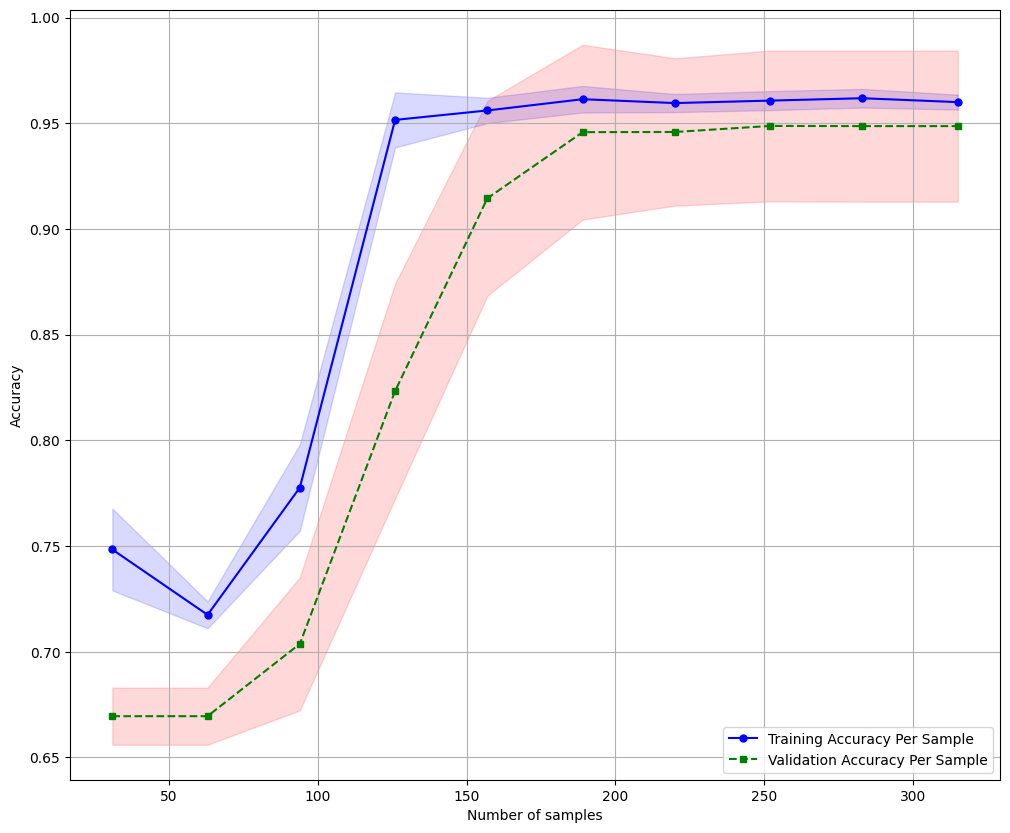

Confusion Matrix
[[ 54  10]
 [  0 107]]
Accuracy: 0.9415, Precision: 0.9145, Recall: 1.0000, F1: 0.9554, AUC: 0.9778


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {'n_components': 15})
helper.train_and_evaluate_model('rf', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)